In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
drivers = pd.read_csv('/content/drivers.csv')
driver_standings = pd.read_csv('/content/driver_standings.csv')
races = pd.read_csv('/content/races.csv')
constructors = pd.read_csv('/content/constructors.csv')
constructor_standings = pd.read_csv('/content/constructor_standings.csv')
constructor_results = pd.read_csv('/content/constructor_results.csv')
qualifying = pd.read_csv('/content/qualifying.csv')

In [3]:
print(drivers.columns)
print(driver_standings.columns)
print(races.columns)
print(constructors.columns)
print(constructor_standings.columns)
print(constructor_results.columns)
print(qualifying.columns)

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')
Index(['driverStandingsId', 'raceId', 'driverId', 'points', 'position',
       'positionText', 'wins'],
      dtype='object')
Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')
Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url'], dtype='object')
Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins'],
      dtype='object')
Index(['constructorResultsId', 'raceId', 'constructorId', 'points', 'status'], dtype='object')
Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'position', 'q1', 'q2', 'q3'],
      dtype='object')


Filtering Data from 2013 to 2023

In [4]:
start_year = 2013
end_year = 2023

races_filtered = races[(races['year'] >= start_year) & (races['year'] <= end_year)]

filtered_race_ids = races_filtered['raceId']

df_driver_standings_filtered = driver_standings[driver_standings['raceId'].isin(filtered_race_ids)]
df_constructor_standings_filtered =  constructor_standings[constructor_standings['raceId'].isin(filtered_race_ids)]
df_qualifying_filtered =  qualifying[qualifying['raceId'].isin(filtered_race_ids)]
drivers_filtered = drivers[drivers['driverId'].isin(driver_standings['driverId'])]


In [5]:
print(f"Filtered races dataset years: {races_filtered['year'].min()} - {races_filtered['year'].max()}")

print(f"Number of rows in filtered drivers: {drivers_filtered.shape[0]}")
print(f"Number of rows in filtered races: {races_filtered.shape[0]}")
print(f"Number of rows in filtered driver standings: {df_driver_standings_filtered.shape[0]}")
print(f"Number of rows in filtered constructor standings: {df_constructor_standings_filtered.shape[0]}")
print(f"Number of rows in filtered qualifying: {df_qualifying_filtered.shape[0]}")


Filtered races dataset years: 2013 - 2023
Number of rows in filtered drivers: 852
Number of rows in filtered races: 223
Number of rows in filtered driver standings: 4771
Number of rows in filtered constructor standings: 2288
Number of rows in filtered qualifying: 4549


In [6]:
datasets = {
    'Constructor Standings': df_constructor_standings_filtered,
    'Driver Standings': df_driver_standings_filtered,
    'Drivers': drivers_filtered,
    'Races': races_filtered,
    'Qualifying': df_qualifying_filtered
}

for name, df in datasets.items():
    print(f"\n{name} Dataset Summary:")
    print(df.info())
    print(df.head())



Constructor Standings Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 2288 entries, 10821 to 13150
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  2288 non-null   int64  
 1   raceId                  2288 non-null   int64  
 2   constructorId           2288 non-null   int64  
 3   points                  2288 non-null   float64
 4   position                2288 non-null   int64  
 5   positionText            2288 non-null   object 
 6   wins                    2288 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 143.0+ KB
None
       constructorStandingsId  raceId  constructorId  points  position  \
10821                   25135     880            208    26.0         2   
10822                   25136     880              6    30.0         1   
10823                   25137     880              9    23.0         3   
10824       

Handling Missing Values

In [7]:
for name, df in datasets.items():
    print(f"\nMissing Values in {name} Dataset:")
    print(df.isnull().sum())

# Replace missing numeric data with 0
constructor_standings.fillna(0, inplace=True)
driver_standings.fillna(0, inplace=True)

# For text columns, consider using an appropriate placeholder like 'Unknown'
constructors['name'].fillna('Unknown', inplace=True)
drivers['nationality'].fillna('Unknown', inplace=True)



Missing Values in Constructor Standings Dataset:
constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64

Missing Values in Driver Standings Dataset:
driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

Missing Values in Drivers Dataset:
driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

Missing Values in Races Dataset:
raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date   

<ipython-input-7-631a5999ce53>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  constructors['name'].fillna('Unknown', inplace=True)
<ipython-input-7-631a5999ce53>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [8]:
for name, df in datasets.items():
    print(f"\nDescriptive Statistics for {name} Dataset:")
    print(df.describe(include='all'))


Descriptive Statistics for Constructor Standings Dataset:
        constructorStandingsId       raceId  constructorId       points  \
count              2288.000000  2288.000000    2288.000000  2288.000000   
unique                     NaN          NaN            NaN          NaN   
top                        NaN          NaN            NaN          NaN   
freq                       NaN          NaN            NaN          NaN   
mean              27061.869755   999.389860      70.337850   106.723121   
std                 959.532094    69.472383      86.126106   146.849281   
min               25135.000000   880.000000       1.000000     0.000000   
25%               26389.750000   942.000000       5.000000     9.000000   
50%               27058.500000   999.000000      10.000000    43.000000   
75%               27790.250000  1059.000000     131.000000   140.000000   
max               28712.000000  1120.000000     214.000000   860.000000   

           position positionText        

In [9]:
print(f"Unique Constructors: {constructors['name'].nunique()}")
print(f"Unique Drivers: {drivers['surname'].nunique()}")

# Top 5 constructors based on standings
top_constructors = constructor_standings.groupby('constructorId')['points'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Constructors by Points:")
print(top_constructors)

# Top 5 drivers based on standings
top_drivers = driver_standings.groupby('driverId')['points'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Drivers by Points:")
print(top_drivers)

Unique Constructors: 212
Unique Drivers: 800

Top 5 Constructors by Points:
constructorId
6      96699.0
9      77850.5
131    77810.5
1      61413.5
3      32398.5
Name: points, dtype: float64

Top 5 Drivers by Points:
driverId
1      49022.5
20     32026.0
830    28687.5
4      23879.0
822    19541.0
Name: points, dtype: float64


Getting Construtor Standings

In [10]:
df_constructor_standings_filtered = df_constructor_standings_filtered.merge(races[['raceId']], on='raceId', how='inner')
df_constructor_standings_filtered = df_constructor_standings_filtered.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')
df_constructor_standings_filtered = df_constructor_standings_filtered.merge(races[['raceId', 'round']], on='raceId', how='left')

df_constructor_standings_filtered.drop(['constructorStandingsId', 'positionText'], axis=1, inplace=True)
df_constructor_standings_filtered = df_constructor_standings_filtered[['round', 'name', 'points', 'position', 'wins', 'raceId', 'constructorId']]

df_constructor_standings_filtered.head()

,round,name,points,position,wins,raceId,constructorId
0,1,Lotus F1,26.0,2,1,880,208
1,1,Ferrari,30.0,1,0,880,6
2,1,Red Bull,23.0,3,0,880,9
3,1,Mercedes,10.0,4,0,880,131
4,1,Force India,10.0,5,0,880,10


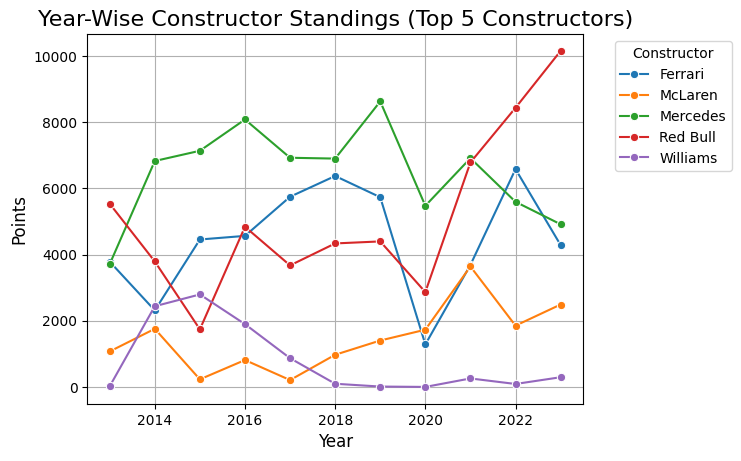

In [11]:
df_constructor_standings = df_constructor_standings_filtered.merge(
    races[['raceId', 'year']], on='raceId', how='left')

# Aggregate constructor points and wins by year and constructor
constructor_yearly = df_constructor_standings.groupby(['year', 'name'])[['points', 'wins']].sum().reset_index()

top_constructors = constructor_yearly.groupby('name')['points'].sum().nlargest(5).index

top_constructor_yearly = constructor_yearly[constructor_yearly['name'].isin(top_constructors)]

sns.lineplot(data=top_constructor_yearly, x='year', y='points', hue='name', marker='o')
plt.title('Year-Wise Constructor Standings (Top 5 Constructors)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



Getting Driver Standings

In [12]:
df_driver_standings_filtered = df_driver_standings_filtered.merge(races[['raceId']], on='raceId', how='inner')
df_driver_standings_filtered = df_driver_standings_filtered.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
df_driver_standings_filtered = df_driver_standings_filtered.merge(races[['raceId', 'round']], on='raceId', how='left')

df_driver_standings_filtered['Driver'] = df_driver_standings_filtered['forename'] + ' ' + df_driver_standings_filtered['surname']
df_driver_standings_filtered.drop(['forename', 'surname','driverStandingsId', 'positionText'], axis=1, inplace=True)
df_driver_standings_filtered = df_driver_standings_filtered[['round', 'Driver', 'points', 'position', 'wins', 'raceId', 'driverId']]

df_driver_standings_filtered.head()

,round,Driver,points,position,wins,raceId,driverId
0,1,Max Verstappen,10.0,5,0,969,830
1,1,Kimi Räikkönen,12.0,4,0,969,8
2,1,Valtteri Bottas,15.0,3,0,969,822
3,1,Lewis Hamilton,18.0,2,0,969,1
4,1,Sebastian Vettel,25.0,1,1,969,20


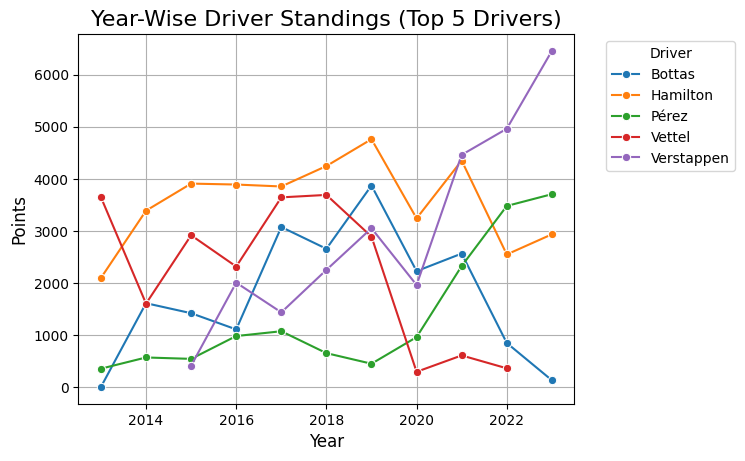

In [13]:
df_driver_standings = df_driver_standings_filtered.merge(races_filtered[['raceId', 'year']], on='raceId', how='left')

# Merge driver details to include driver names
df_driver_standings = df_driver_standings.merge(drivers[['driverId', 'surname']], on='driverId', how='left')

# Aggregate driver points by year and driver
driver_yearly = df_driver_standings.groupby(['year', 'surname'])[['points']].sum().reset_index()


top_drivers = driver_yearly.groupby('surname')['points'].sum().nlargest(5).index
top_driver_yearly = driver_yearly[driver_yearly['surname'].isin(top_drivers)]

sns.lineplot(data=top_driver_yearly, x='year', y='points', hue='surname', marker='o')
plt.title('Year-Wise Driver Standings (Top 5 Drivers)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Checking Qualifying Data

In [14]:
df_qualifying_filtered = df_qualifying_filtered.merge(races_filtered[['raceId']], on='raceId', how='inner')
df_qualifying_filtered = df_qualifying_filtered.merge(drivers_filtered[['driverId']], on='driverId', how='inner')

df_qualifying_filtered = df_qualifying_filtered.replace('\\N', '0:0')

def convert_to_seconds(time_str):
    if pd.isnull(time_str):
        return np.nan
    mins, secs = map(float, time_str.split(':'))
    return mins * 60 + secs

df_qualifying_filtered['q1'] = df_qualifying_filtered['q1'].apply(convert_to_seconds)
df_qualifying_filtered['q2'] = df_qualifying_filtered['q2'].apply(convert_to_seconds)
df_qualifying_filtered['q3'] = df_qualifying_filtered['q3'].apply(convert_to_seconds)


df_qualifying_filtered.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,5442,880,20,9,1,1,104.657,96.745,87.407
1,5443,880,17,9,2,2,104.472,96.524,87.827
2,5444,880,1,131,10,3,105.456,96.625,88.087
3,5445,880,13,6,4,4,104.635,96.666,88.490
4,5446,880,4,6,3,5,103.850,96.691,88.493
